In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import *
from sklearn import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import *
from sklearn.cross_decomposition import *
from sklearn.neural_network import MLPRegressor
from scipy.stats import *

# I. Import of the dataframes & clean of the data

In [9]:
# Raph dataset
df_raph = pd.read_csv("raph_csv.csv", sep=";")

In [10]:
# Clo dataset
df_clo = pd.read_csv("clo_csv.csv")
df_clo = df_clo.drop(['Unnamed: 0'], axis=1)

In [12]:
# Erwann dataset
df_erwann = pd.read_csv("erwann_csv.csv", sep=";")

In [13]:
### Raph Data Cleaning ###

onInt = 10

# Height
df_raph.loc[(df_raph['Taille'] == 0), 'height'] = 160
df_raph.loc[(df_raph['Taille'] == 1), 'height'] = 170
df_raph.loc[(df_raph['Taille'] == 2), 'height'] = 180

# Weight
df_raph['weight'] = (df_raph['Corpulence'] / 4)

# Extravert
df_raph['extravert'] = (df_raph['Extraverti'] / 2)

# Crazyness
df_raph['crazyness'] = (df_raph['Crazy'] / 5)

# Physical attraction
df_raph['physical attraction'] = (df_raph['Attirance physique'] / 4) * onInt

# Sexual attraction
df_raph['sexual attraction'] = (df_raph['Attirance sexuelle'] / 5) * onInt

# Relationship attraction
df_raph['relationship attraction'] = (df_raph['Attirance amoureuse'] / 2) * onInt

# Friendship attraction
df_raph['friendship attraction'] = (df_raph['Attirance amicale'] / 2) * onInt

# Score
df_raph['score'] = ((df_raph['physical attraction'] + df_raph['sexual attraction'] + df_raph['relationship attraction'] + df_raph['friendship attraction']) / 4)

# Adding non-linear model
df_raph["square height"] = df_raph["height"]**2 # Improve RMSE

# Drop old columns
df_raph = df_raph.drop(['height'], axis=1)
df_raph = df_raph.drop(['Crazy'], axis=1)
df_raph = df_raph.drop(['Extraverti'], axis=1)
df_raph = df_raph.drop(['Taille'], axis=1)
df_raph = df_raph.drop(['Corpulence'], axis=1)
df_raph = df_raph.drop(['Attirance physique'], axis=1)
df_raph = df_raph.drop(['Attirance sexuelle'], axis=1)
df_raph = df_raph.drop(['Attirance amoureuse'], axis=1)
df_raph = df_raph.drop(['Attirance amicale'], axis=1)

In [14]:
### Clo Data Cleaning ###

# SEX
df_clo.loc[(df_clo['sexe'] == 'M'), 'sex'] = 1
df_clo.loc[(df_clo['sexe'] == 'F'), 'sex'] = 0

# Level of study
df_clo.loc[(df_clo['study level'] == 'brevet'), 'level of study'] = -3
df_clo.loc[(df_clo['study level'] == 'bac'), 'level of study'] = 0
df_clo.loc[(df_clo['study level'] == 'dut/bts'), 'level of study'] = 2
df_clo.loc[(df_clo['study level'] == 'license'), 'level of study'] = 3
df_clo.loc[(df_clo['study level'] == 'bachelor'), 'level of study'] = 4
df_clo.loc[(df_clo['study level'] == 'master'), 'level of study'] = 5
df_clo.loc[(df_clo['study level'] == 'doctorat'), 'level of study'] = 8

# Weight
df_clo.loc[(df_clo['weight'] == 'skinny'), 'body weight'] = 0
df_clo.loc[(df_clo['weight'] == 'fit'), 'body weight'] = 1
df_clo.loc[(df_clo['weight'] == 'normal '), 'body weight'] = 2
df_clo.loc[(df_clo['weight'] == 'surpoid'), 'body weight'] = 3
df_clo.loc[(df_clo['weight'] == 'obésité'), 'body weight'] = 4

# Eyes color
df_clo.loc[(df_clo['eyes color'] == 'clair'), 'color of the eyes'] = 0
df_clo.loc[(df_clo['eyes color'] == 'foncé'), 'color of the eyes'] = 1


# Smoking
df_clo.loc[(df_clo['smoking'] == 'non'), 'is smoking'] = 0
df_clo.loc[(df_clo['smoking'] == 'oui'), 'is smoking'] = 1


# Extravert
df_clo.loc[(df_clo['extravert'] == 'non'), 'is extravert'] = 0
df_clo.loc[(df_clo['extravert'] == 'none'), 'is extravert'] = 0.5
df_clo.loc[(df_clo['extravert'] == 'oui'), 'is extravert'] = 1

# Score
df_clo['score'] = ((df_clo['physical attraction'] + df_clo['friendship attraction'] + df_clo['relationship attraction']) / 3)

# Adding non-linear model
df_clo["square height"] = df_clo["height"]**2 # Improve RMSE

# Drop old columns
df_clo = df_clo.drop(['height'], axis=1)
df_clo = df_clo.drop(['extravert'], axis=1)
df_clo = df_clo.drop(['smoking'], axis=1)
df_clo = df_clo.drop(['eyes color'], axis=1)
df_clo = df_clo.drop(['weight'], axis=1)
df_clo = df_clo.drop(['study level'], axis=1)
df_clo = df_clo.drop(['sexe'], axis=1)

In [15]:
### Erwann Data Cleaning ###

# SEX
df_erwann.loc[(df_erwann['sexe'] == 'M'), 'sex'] = 1
df_erwann.loc[(df_erwann['sexe'] == 'F'), 'sex'] = 0

# Level of study
df_erwann.loc[(df_erwann['study level'] == 'brevet'), 'level of study'] = -3
df_erwann.loc[(df_erwann['study level'] == 'bac'), 'level of study'] = 0
df_erwann.loc[(df_erwann['study level'] == 'dut/bts'), 'level of study'] = 2
df_erwann.loc[(df_erwann['study level'] == 'license'), 'level of study'] = 3
df_erwann.loc[(df_erwann['study level'] == 'bachelor'), 'level of study'] = 4
df_erwann.loc[(df_erwann['study level'] == 'master'), 'level of study'] = 5
df_erwann.loc[(df_erwann['study level'] == 'doctorat'), 'level of study'] = 8

# Weight
df_erwann.loc[(df_erwann['weight'] == 'skinny'), 'body weight'] = 0
df_erwann.loc[(df_erwann['weight'] == 'fit'), 'body weight'] = 1
df_erwann.loc[(df_erwann['weight'] == 'normal '), 'body weight'] = 2
df_erwann.loc[(df_erwann['weight'] == 'surpoid'), 'body weight'] = 3
df_erwann.loc[(df_erwann['weight'] == 'obésité'), 'body weight'] = 4

# Eyes color
df_erwann.loc[(df_erwann['eyes color'] == 'clair'), 'color of the eyes'] = 0
df_erwann.loc[(df_erwann['eyes color'] == 'foncé'), 'color of the eyes'] = 1


# Smoking
df_erwann.loc[(df_erwann['smoking'] == 'non'), 'is smoking'] = 0
df_erwann.loc[(df_erwann['smoking'] == 'oui'), 'is smoking'] = 1


# Extravert
df_erwann.loc[(df_erwann['extravert'] == 'non'), 'is extravert'] = 0
df_erwann.loc[(df_erwann['extravert'] == 'none'), 'is extravert'] = 1
df_erwann.loc[(df_erwann['extravert'] == 'oui'), 'is extravert'] = 2

# Score
df_erwann['score'] = ((df_erwann['physical attraction'] + df_erwann['friendship attraction'] + df_erwann['relationship attraction']) / 3)

# Adding non-linear model
df_erwann["square height"] = df_erwann["height"]**2 # Improve RMSE

# Drop old columns
df_erwann = df_erwann.drop(['extravert'], axis=1)
df_erwann = df_erwann.drop(['height'], axis=1)
df_erwann = df_erwann.drop(['smoking'], axis=1)
df_erwann = df_erwann.drop(['eyes color'], axis=1)
df_erwann = df_erwann.drop(['weight'], axis=1)
df_erwann = df_erwann.drop(['study level'], axis=1)
df_erwann = df_erwann.drop(['sexe'], axis=1)

# II. Preprocessing of the data

In [16]:
# Raph One Hot Encoding #
df_hot_encoded_raph = pd.get_dummies(df_raph)
print("Raph dataframe shape", df_hot_encoded_raph.shape)

Raph dataframe shape (154, 21)


In [17]:
# Clo One Hot Encoding #
df_hot_encoded_clo = pd.get_dummies(df_clo)
print("Clo dataframe shape", df_hot_encoded_clo.shape)

Clo dataframe shape (304, 26)


In [18]:
# Erwann One Hot Encoding #
df_hot_encoded_erwann = pd.get_dummies(df_erwann)
print("Erwann dataframe shape", df_hot_encoded_erwann.shape)

Erwann dataframe shape (159, 24)


# III. Explore the datasets

### 1. See the data

In [20]:
# Raph dataset exploration #
df_hot_encoded_raph.head()

,Année de naissance,Yeux,Kiss,Sexual relation,Couple,Histoire,Crush,Smoking,weight,extravert,...,physical attraction,sexual attraction,relationship attraction,friendship attraction,score,square height,Cheveux_Aubeurn,Cheveux_Blonde,Cheveux_Brune,Cheveux_Chatain
0,2000,1,1,0,1,1,1,0,0.50,0.0,...,5.0,4.0,0.0,5.0,3.500,28900.0,0,0,1,0
1,2003,1,1,0,0,1,1,0,0.50,0.5,...,10.0,8.0,5.0,10.0,8.250,25600.0,0,0,1,0
2,2000,0,1,0,0,0,0,0,0.25,0.0,...,2.5,2.0,0.0,0.0,1.125,28900.0,0,1,0,0
3,2000,0,1,0,0,1,1,1,0.50,0.0,...,7.5,8.0,0.0,5.0,5.125,25600.0,0,0,0,1
4,1999,1,0,0,0,0,0,1,0.50,0.5,...,5.0,4.0,0.0,0.0,2.250,28900.0,1,0,0,0


In [21]:
# Clo dataset exploration #
df_hot_encoded_clo.head()

,year of birth,physical attraction,friendship attraction,relationship attraction,sex,level of study,body weight,color of the eyes,is smoking,is extravert,...,study domain_ingénieur,study domain_littéraire,study domain_math,study domain_medecine,hair color_blond,hair color_brun,hair color_châtain,hair color_coloré,hair color_noir,hair color_roux
0,2000,6,7,1,1.0,5.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
1,2000,3,8,4,0.0,3.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2000,2,6,1,0.0,3.0,2.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
3,2000,6,6,2,1.0,5.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2000,7,8,6,1.0,5.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,0


In [22]:
# Erwann dataset exploration #
df_hot_encoded_erwann.head()

,year of birth,physical attraction,friendship attraction,relationship attraction,sex,level of study,body weight,color of the eyes,is smoking,is extravert,...,study domain_commercial,study domain_ingénieur,study domain_littéraire,study domain_medecine,hair color_blond,hair color_brun,hair color_châtain,hair color_coloré,hair color_noir,hair color_roux
0,2000,5,10,1,1.0,5.0,2.0,0.0,0.0,2.0,...,0,1,0,0,0,1,0,0,0,0
1,2000,5,6,3,0.0,5.0,2.0,0.0,0.0,2.0,...,0,1,0,0,0,0,1,0,0,0
2,2000,6,7,2,1.0,5.0,2.0,1.0,0.0,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2000,3,5,0,0.0,5.0,2.0,1.0,1.0,2.0,...,0,1,0,0,0,1,0,0,0,0
4,1999,6,6,6,0.0,5.0,2.0,1.0,1.0,2.0,...,0,1,0,0,0,0,0,0,1,0


### 2. Describe the data

In [23]:
# Raph dataset describe #
df_hot_encoded_raph.describe()

,Année de naissance,Yeux,Kiss,Sexual relation,Couple,Histoire,Crush,Smoking,weight,extravert,...,physical attraction,sexual attraction,relationship attraction,friendship attraction,score,square height,Cheveux_Aubeurn,Cheveux_Blonde,Cheveux_Brune,Cheveux_Chatain
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2000.305195,0.577922,0.253247,0.051948,0.051948,0.253247,0.318182,0.357143,0.508117,0.662338,...,5.487013,4.870130,2.207792,3.279221,3.961039,28437.012987,0.019481,0.214286,0.597403,0.168831
std,2.121560,0.495502,0.436290,0.222646,0.222646,0.436290,0.467290,0.480721,0.198892,0.378694,...,2.682519,2.873592,3.130444,3.202321,2.230925,2213.563398,0.138657,0.411665,0.492021,0.375825
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25600.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,...,5.000000,4.000000,0.000000,0.000000,2.250000,25600.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.750000,...,5.000000,4.000000,0.000000,5.000000,3.500000,28900.000000,0.000000,0.000000,1.000000,0.000000
75%,2001.000000,1.000000,0.750000,0.000000,0.000000,0.750000,1.000000,1.000000,0.500000,1.000000,...,7.500000,6.000000,5.000000,5.000000,5.718750,28900.000000,0.000000,0.000000,1.000000,0.000000
max,2005.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,32400.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# CLo dataset describe #
df_hot_encoded_clo.describe()

,year of birth,physical attraction,friendship attraction,relationship attraction,sex,level of study,body weight,color of the eyes,is smoking,is extravert,...,study domain_ingénieur,study domain_littéraire,study domain_math,study domain_medecine,hair color_blond,hair color_brun,hair color_châtain,hair color_coloré,hair color_noir,hair color_roux
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,1999.805921,5.138158,4.848684,4.190789,0.657895,4.375000,1.486842,0.717105,0.381579,0.692434,...,0.559211,0.019737,0.032895,0.026316,0.157895,0.542763,0.105263,0.019737,0.134868,0.039474
std,2.239423,1.759648,1.885361,1.675817,0.475197,1.006989,0.889891,0.451148,0.486575,0.461353,...,0.497300,0.139324,0.178655,0.160337,0.365243,0.498989,0.307398,0.139324,0.342146,0.195040
min,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,4.000000,4.000000,3.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,5.000000,5.000000,4.000000,1.000000,5.000000,2.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,6.000000,6.000000,5.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2004.000000,10.000000,10.000000,9.000000,1.000000,8.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Erwann dataset describe #
df_hot_encoded_erwann.describe()

,year of birth,physical attraction,friendship attraction,relationship attraction,sex,level of study,body weight,color of the eyes,is smoking,is extravert,...,study domain_commercial,study domain_ingénieur,study domain_littéraire,study domain_medecine,hair color_blond,hair color_brun,hair color_châtain,hair color_coloré,hair color_noir,hair color_roux
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1999.867925,3.974843,6.138365,2.496855,0.534591,4.792453,1.773585,0.522013,0.301887,1.245283,...,0.251572,0.628931,0.037736,0.018868,0.188679,0.301887,0.037736,0.006289,0.459119,0.006289
std,1.454427,2.381229,1.481865,2.755602,0.500378,0.849985,0.674345,0.501093,0.460527,0.972515,...,0.435288,0.484617,0.191159,0.136488,0.392490,0.460527,0.191159,0.079305,0.499900,0.079305
min,1988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,2.000000,5.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,4.000000,6.000000,1.000000,1.000000,5.000000,2.000000,1.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,6.000000,7.000000,5.000000,1.000000,5.000000,2.000000,1.000000,1.000000,2.000000,...,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2005.000000,9.000000,10.000000,8.000000,1.000000,8.000000,4.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Correlation matrices

In [26]:
def matrix_corr(df):
    corr = []
    for i in df.columns: 
        res = []
        for j in df.columns:
            res.append(pointbiserialr(df[i],df[j])[0])
        corr.append(res)

    return(pd.DataFrame(corr, index= df.columns, columns=df.columns ))

<AxesSubplot:>

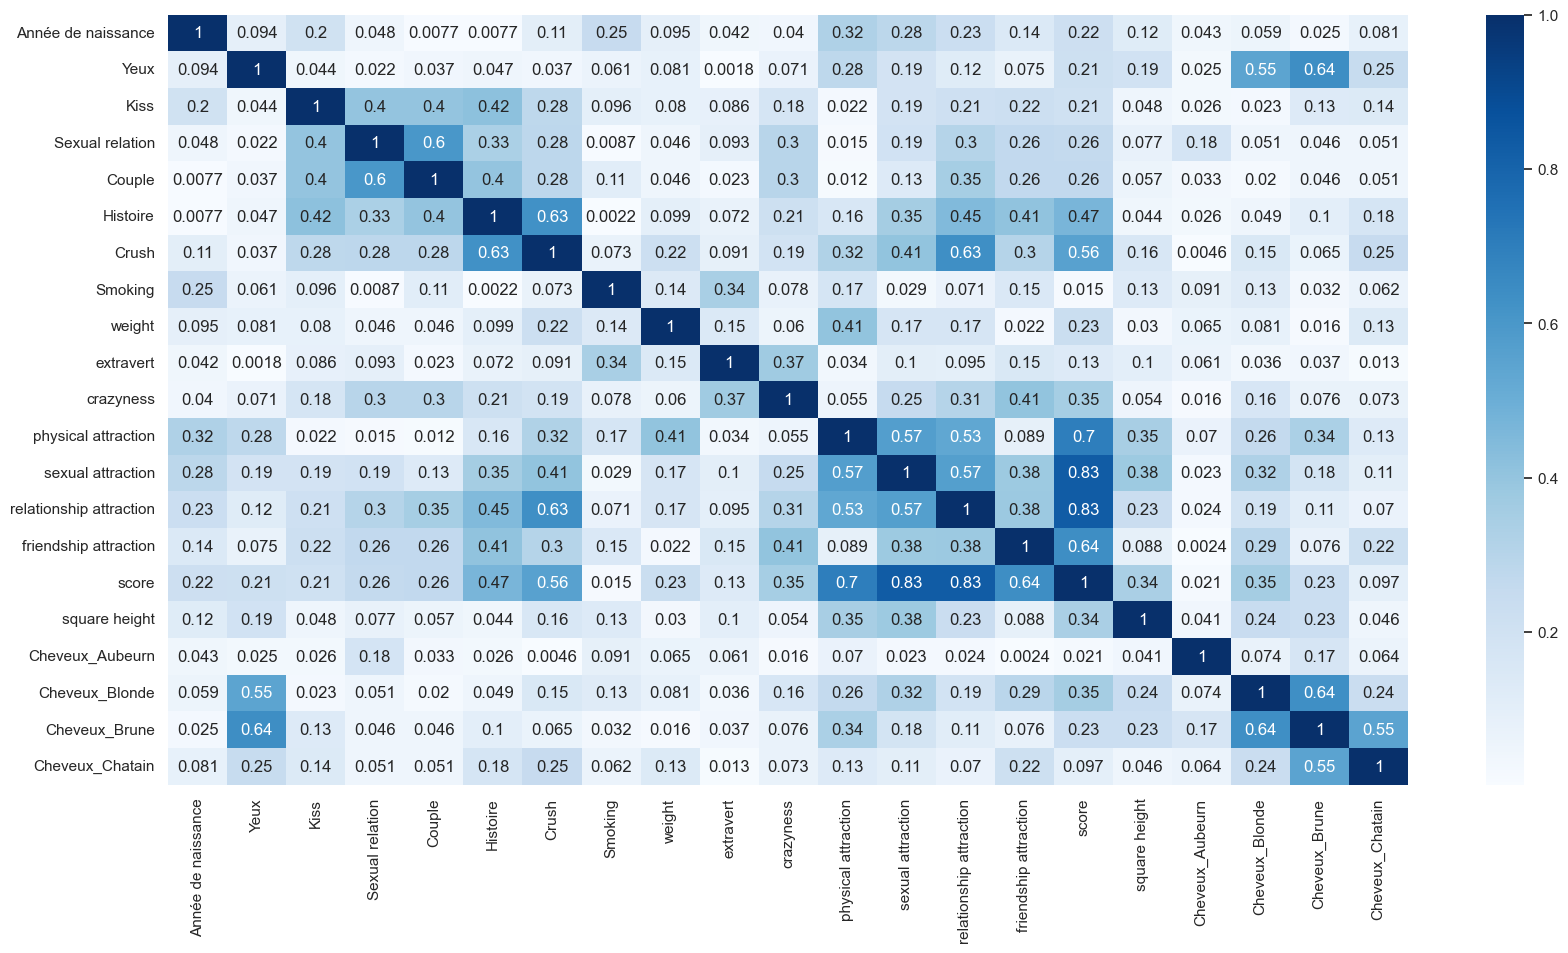

In [27]:
# Raph correlation matrix #
corr_raph = matrix_corr(df_hot_encoded_raph)
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(abs(corr_raph), cmap='Blues',annot= True )

<AxesSubplot:>

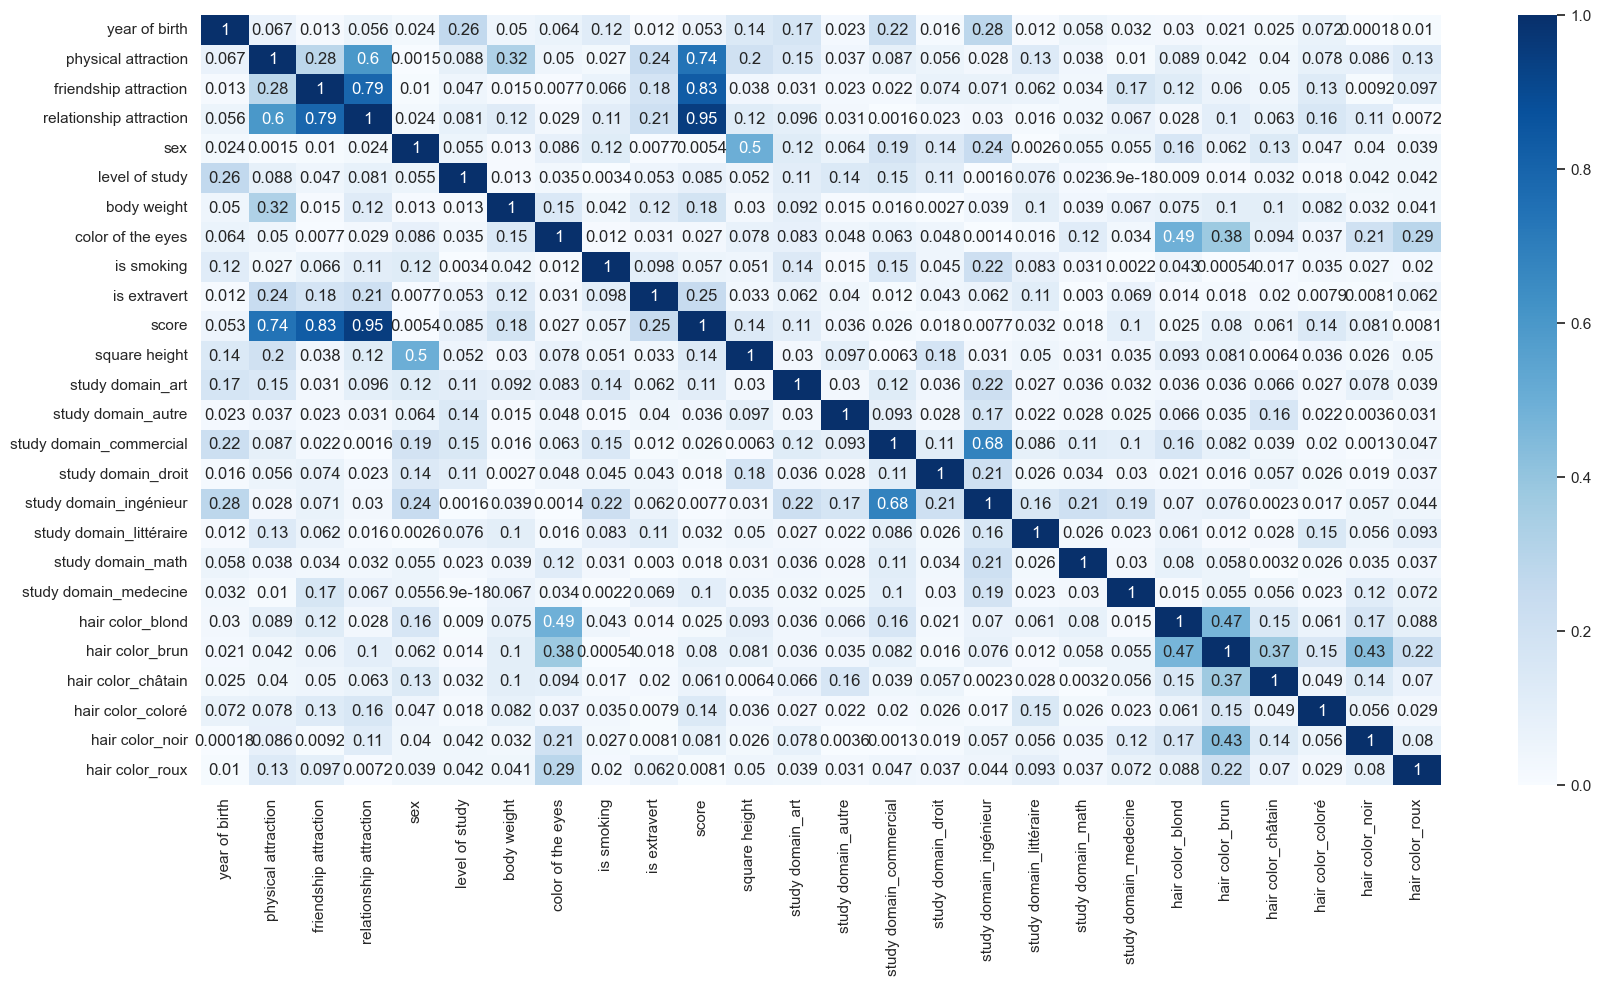

In [28]:
# Clo correlation matrix #
corr_clo = matrix_corr(df_hot_encoded_clo)
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(abs(corr_clo), cmap='Blues', annot= True)

<AxesSubplot:>

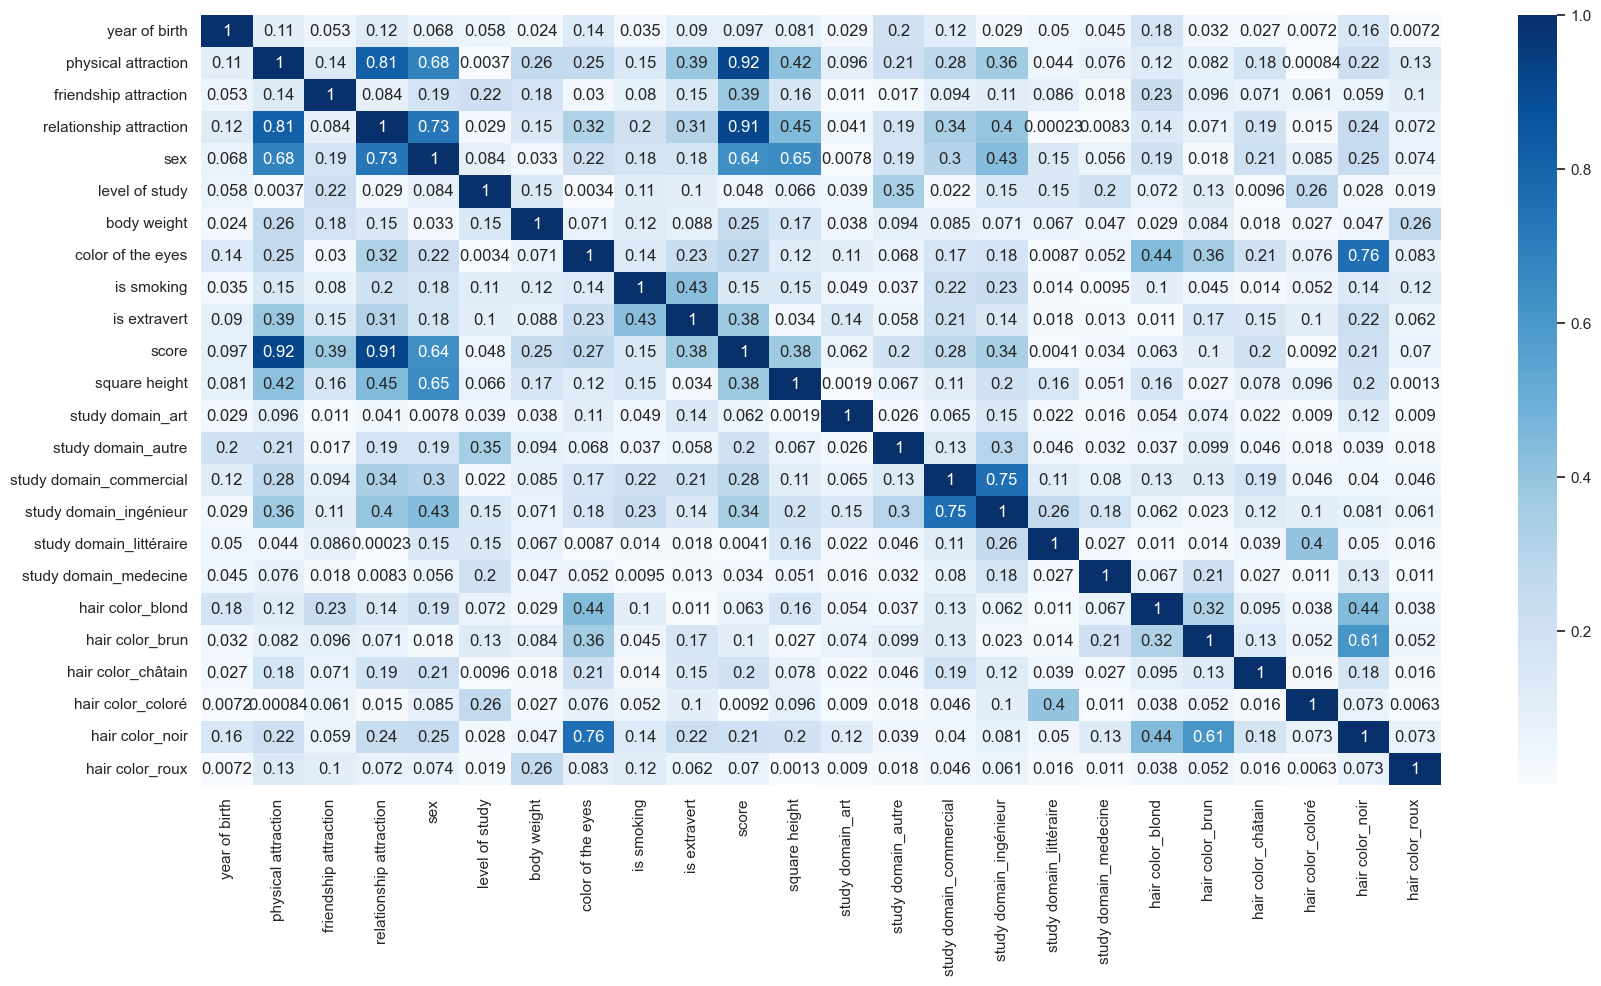

In [29]:
# Erwann correlation matrix #
corr_erwann = matrix_corr(df_hot_encoded_erwann)
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(abs(corr_erwann), cmap='Blues', annot= True)

# IV. Prepare the datasets for models

### 1. Split the data in X and Y datasets

In [22]:
def split_dataframe(df, type_):
    
    if type_ == 0:     
        X = df.drop(["friendship attraction", "relationship attraction", "sexual attraction", "physical attraction", "score"], axis=1)
        y = df[["physical attraction", "sexual attraction", "relationship attraction", "friendship attraction", "score"]]
        
    elif type_ == 1:
        X = df.drop(["friendship attraction", "relationship attraction", "physical attraction", "score"], axis=1)
        y = df[["physical attraction", "relationship attraction", "friendship attraction", "score"]]
        
    else:
        print("No type : ", type_)
        
    return X, y

In [25]:
# Splitting the dataframes

# Raph
X_raph, y_raph = split_dataframe(df_hot_encoded_raph, 0)
Xtrain_raph, Xtest_raph, ytrain_raph, ytest_raph = train_test_split(X_raph, y_raph, test_size=0.15, shuffle=True)
Xfeatures_raph = X_raph.columns
yfeatures_raph = y_raph.columns

# Clo
X_clo, y_clo = split_dataframe(df_hot_encoded_clo, 1)
Xtrain_clo, Xtest_clo, ytrain_clo, ytest_clo = train_test_split(X_clo, y_clo, test_size=0.15, shuffle=True)
Xfeatures_clo = X_clo.columns
yfeatures_clo = y_clo.columns

# Erwann
X_erwann, y_erwann = split_dataframe(df_hot_encoded_erwann, 1)
Xtrain_erwann, Xtest_erwann, ytrain_erwann, ytest_erwann = train_test_split(X_erwann, y_erwann, test_size=0.15, shuffle=True)
Xfeatures_erwann = X_erwann.columns
yfeatures_erwann = y_erwann.columns

### 2. Scaling the datasets

In [27]:
# The scaling do not improve the results (scale will be applied in the model)

# Preprocessing
#scaler = StandardScaler()
#scaler.fit(Xtrain)  
#Xtrain = scaler.transform(Xtrain)  
#Xtest = scaler.transform(Xtest) 

# V. Training the models

### 1. Testing models to find the best one

In [28]:
def RMSE(model, Xtest, ytest):
    predictions = model.predict(Xtest)
    RMSE = np.sqrt(np.sum((ytest-predictions)**2)*(1/predictions.shape[0]))
    return RMSE

In [29]:
def trainModel(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    return RMSE(model, Xtest, ytest)

In [30]:
def trainMultipleModels(models, Xtrain, ytrain, Xtest, ytest):
    RMSEs = []
    for model in models:
        RMSE = trainModel(model, Xtrain, ytrain, Xtest, ytest)
        RMSE = np.sum(RMSE)
        RMSEs.append(RMSE)
    return RMSEs

In [34]:
# Testing the best type of model

models = []

# Ridge model
ridgeModel = Ridge()
models.append(ridgeModel)

# Lasso model
lassoModel = Lasso()
models.append(lassoModel)

# Tree model
treeModel = tree.DecisionTreeRegressor()
models.append(treeModel)

# Random Forest
randomForestModel = RandomForestRegressor()
models.append(randomForestModel)

# Multiple regressor
multipleModel = MultiOutputRegressor(GradientBoostingRegressor()).fit(Xtrain_raph, ytrain_raph)
models.append(multipleModel)

# PLS regression model
PLSRegressionModel  = PLSRegression()
models.append(PLSRegressionModel)

# PLS canonical model
PLSCanonicalModel = PLSCanonical()
models.append(PLSCanonicalModel)

# NeuralNetwork model
NNModel = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive')
models.append(NNModel)

RMSEs = trainMultipleModels(models, Xtrain_raph, ytrain_raph, Xtest_raph, ytest_raph)
RMSEs

# The best model is PLS Regression Model

[11.696971892400509,
 14.047006540350655,
 14.545237027450561,
 11.762028195126412,
 11.968148728736136,
 11.46760394741021,
 13.075782308020361,
 15.021570010647]

In [35]:
# Testing the best arguments of the model

PLSRegressionModels = []
# This is test area

# best n_components = 2
# best scale=True
# other parameters dont do much

# PLS regression model 1
PLSRegressionModel1  = PLSRegression(n_components=2, scale=True, tol=1e-02)
PLSRegressionModels.append(PLSRegressionModel1)

# PLS regression model 2
PLSRegressionModel2  = PLSRegression(n_components=2, scale=False, tol=1e-06)
PLSRegressionModels.append(PLSRegressionModel2)

# PLS regression model 3
PLSRegressionModel3  = PLSRegression(n_components=2, scale=False, tol=1e-09)
PLSRegressionModels.append(PLSRegressionModel3)

# PLS regression model 4
PLSRegressionModel4  = PLSRegression(n_components=2, scale=False,tol=1e-15)
PLSRegressionModels.append(PLSRegressionModel4)

# PLS regression model 5
PLSRegressionModel5  = PLSRegression(n_components=2, scale=False, tol=1e-20)
PLSRegressionModels.append(PLSRegressionModel5)

RMSEs = trainMultipleModels(PLSRegressionModels, Xtrain_raph, ytrain_raph, Xtest_raph, ytest_raph)
RMSEs

[11.470932662076994,
 13.799473709602685,
 13.79944303688033,
 13.799442470809318,
 13.799442469423875]

### 2. Building the models

In [37]:
# Initialisation of the models
raphModel = PLSRegression(n_components=2, scale=True, tol=1e-02)
cloModel = PLSRegression(n_components=2, scale=True, tol=1e-02)
erwannModel = PLSRegression(n_components=2, scale=True, tol=1e-02)

# Training of the models
RMSE_raph = trainModel(raphModel, Xtrain_raph, ytrain_raph, Xtest_raph, ytest_raph)
RMSE_clo = trainModel(cloModel, Xtrain_clo, ytrain_clo, Xtest_clo, ytest_clo)
RMSE_erwann = trainModel(erwannModel, Xtrain_erwann, ytrain_erwann, Xtest_erwann, ytest_erwann)

### 3. Testing the models

In [38]:
# Raph test
print("X features : ", Xfeatures_raph)
arr_test = [2000, #Year
            0, #Eyes
            0, #Kiss
            1, #Sex
            0, #Couple
            0, #History
            1, #Crush
            0, #Smoking
            2, #Extravert
            5, #Crazyness
            0.5, #Weight
            160**2, #sq height
            0, #Aubern
            0, #Blonde
            1, #Brune
            0, #Chatain
           ] 
arr_test2 = np.array(Xtrain_raph.iloc[0])
arr_test3 = np.array(Xtest_raph.iloc[1])
raphModel.predict([arr_test])

X features :  Index(['Année de naissance', 'Yeux', 'Kiss', 'Sexual relation', 'Couple',
       'Histoire', 'Crush', 'Smoking', 'weight', 'extravert', 'crazyness',
       'square height', 'Cheveux_Aubeurn', 'Cheveux_Blonde', 'Cheveux_Brune',
       'Cheveux_Chatain'],
      dtype='object')


array([[3.29567599, 6.5298347 , 4.78200034, 7.44688504, 5.51359902]])

In [39]:
# Clo test
print(Xfeatures_clo)
arr_test = [2000, #Year
            1, #Sex
            5, #Study level
            2, #Weight
            0, #eyes
            0, #smoking
            2, #extravert
            33489, #sq height
            0, #art
            0, #autre
            0, #commercial
            0, #droit
            1, #ingenieur
            0, #literraire
            0, #math
            0, #medecine
            0, #blond
            1, #brun
            0, #chatain
            0, #colore
            0, #noir
            0, #roux
           ]
cloModel.predict([arr_test])[0]

Index(['year of birth', 'sex', 'level of study', 'body weight',
       'color of the eyes', 'is smoking', 'is extravert', 'square height',
       'study domain_art', 'study domain_autre', 'study domain_commercial',
       'study domain_droit', 'study domain_ingénieur',
       'study domain_littéraire', 'study domain_math', 'study domain_medecine',
       'hair color_blond', 'hair color_brun', 'hair color_châtain',
       'hair color_coloré', 'hair color_noir', 'hair color_roux'],
      dtype='object')


array([6.54042886, 5.58665768, 6.00190144, 6.04299599])

In [40]:
# Erwann test
print(Xfeatures_erwann)
arr_test = [2001, #Year
            0, #Sex
            5, #Study level
            1, #Weight
            0, #eyes
            0, #smoking
            1, #extravert
            25600, #sq height
            0, #art
            0, #autre
            1, #commercial
            0, #ingenieur
            0, #literraire
            0, #medecine
            0, #blond
            1, #brun
            0, #chatain
            0, #colore
            0, #noir
            0, #roux
           ]
erwannModel.predict([arr_test])[0]

Index(['year of birth', 'sex', 'level of study', 'body weight',
       'color of the eyes', 'is smoking', 'is extravert', 'square height',
       'study domain_art', 'study domain_autre', 'study domain_commercial',
       'study domain_ingénieur', 'study domain_littéraire',
       'study domain_medecine', 'hair color_blond', 'hair color_brun',
       'hair color_châtain', 'hair color_coloré', 'hair color_noir',
       'hair color_roux'],
      dtype='object')


array([7.1316579 , 5.83220383, 6.22828676, 6.39738283])

# VI. Find the perfect match

### 1. Setting up function to optimize, constraints and bounds

In [61]:
# Function that will be minimize to get the perfect match
def to_minimize(Xarr, model):
    y_arr = model.predict([Xarr])[0]
    return - np.mean(y_arr)

In [63]:
def constraint_raph_hair_color(Xarr):
    return (Xarr[15] + Xarr[14] + Xarr[13] + Xarr[12]) - 1

In [65]:
def constraint_clo_hair_color(Xarr):
    return (Xarr[16] + Xarr[17] + Xarr[18] + Xarr[19] + Xarr[20] + Xarr[21]) - 1

In [67]:
def constraint_erwann_hair_color(Xarr):
    return (Xarr[14] + Xarr[15] + Xarr[16] + Xarr[17] + Xarr[18] + Xarr[19]) - 1

In [64]:
def constraint_clo_study_domain(Xarr):
    return (Xarr[8] + Xarr[9] + Xarr[10] + Xarr[11] + Xarr[12] + Xarr[13] + Xarr[14] + Xarr[15]) - 1

In [66]:
def constraint_erwann_study_domain(Xarr):
    return (Xarr[8] + Xarr[9] + Xarr[10] + Xarr[11] + Xarr[12] + Xarr[13]) - 1

In [68]:
# Initial guess
x0_raph = [np.array(Xtest_raph.iloc[0])]
x0_clo = [np.array(Xtest_clo.iloc[0])]
x0_erwann = [np.array(Xtest_erwann.iloc[0])]

# Bounds
bounds_raph = [(1990, 2005), (0, 1), (0,1), (0,1), (0,1), (0,1),(0,1), (0,1), (0,1), (0,1), (0,1), (0,100000),(0,1), (0,1), (0,1), (0,1)]
bounds_clo = [(1970, 2005), (0,1), (-3,8), (0,4), (0,1),(0,1), (0,1), (0,48400), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1)]
bounds_erwann = [(1970, 2005), (0,1), (-3,8), (0,4), (0,1),(0,1), (0,1), (0,48400), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1)]

# Constraints
con_hair_color_raph = {'type': 'eq', 'fun': constraint_raph_hair_color}
cons_raph = [con_hair_color_raph]

con_study_domain_clo = {'type': 'eq', 'fun': constraint_clo_study_domain}
con_hair_color_clo = {'type': 'eq', 'fun': constraint_clo_hair_color}
cons_clo = [con_study_domain_clo, con_hair_color_clo]

con_study_domain_erwann = {'type': 'eq', 'fun': constraint_erwann_study_domain}
con_hair_color_erwann = {'type': 'eq', 'fun': constraint_erwann_hair_color}
cons_erwann = [con_study_domain_erwann, con_hair_color_erwann]

### 2. Optimize the function

In [85]:
# Optimize
result_raph = sp.optimize.minimize(fun=to_minimize, x0=x0_raph, args=raphModel, bounds=bounds_raph, constraints=cons_raph)
result_clo = sp.optimize.minimize(fun=to_minimize, x0=x0_clo, args=cloModel, bounds=bounds_clo, constraints=cons_clo)
result_erwann = sp.optimize.minimize(fun=to_minimize, x0=x0_erwann, args=erwannModel, bounds=bounds_erwann, constraints=cons_erwann)

# Extract the array for the perfect match
xarr_optimize_raph = result_raph['x']
xarr_optimize_clo = result_clo['x']
xarr_optimize_erwann = result_erwann['x']

perfect_match_arr_raph = round(pd.Series(xarr_optimize_raph, Xfeatures_raph), 3)
perfect_match_arr_clo = round(pd.Series(xarr_optimize_clo, Xfeatures_clo), 3)
perfect_match_arr_erwann = round(pd.Series(xarr_optimize_erwann, Xfeatures_erwann), 3)

# Display perfect match
print("Raphaël perfect match")
print(perfect_match_arr_raph)
print("Score predicted : ", raphModel.predict([perfect_match_arr_raph]))
print("")
print("Clothilde perfect match")
print(perfect_match_arr_clo)
print("Score predicted : ", cloModel.predict([perfect_match_arr_clo]))
print("")
print("Erwann perfect match")
print(perfect_match_arr_erwann)
print("Score predicted : ", erwannModel.predict([perfect_match_arr_erwann]))
print("")

Raphaël perfect match
Année de naissance     2005.000
Yeux                      1.000
Kiss                      1.000
Sexual relation           1.000
Couple                    1.000
Histoire                  1.000
Crush                     1.000
Smoking                   0.000
weight                    0.000
extravert                 1.000
crazyness                 1.000
square height         25599.996
Cheveux_Aubeurn           0.000
Cheveux_Blonde            0.000
Cheveux_Brune             1.000
Cheveux_Chatain           0.000
dtype: float64
Score predicted :  [[10.91808898 12.52194325 11.01326947  8.23591571 10.67230435]]

Clothilde perfect match
year of birth               2005.000
sex                            0.000
level of study                 8.000
body weight                    0.000
color of the eyes              0.000
is smoking                     0.000
is extravert                   1.000
square height              31684.009
study domain_art               0.000
study doma

# VII. Comparaison between models

In [75]:
# Root Mean Squared Error

print("RMSE Raphaël Model")
print(RMSE_raph)
print("Mean : ", np.mean(RMSE_raph))
print("")
print("RMSE Clothilde Model")
print(RMSE_clo)
print("Mean : ", np.mean(RMSE_clo))
print("")
print("RMSE Erwann Model")
print(RMSE_erwann)
print("Mean : ", np.mean(RMSE_erwann))

RMSE Raphaël Model
physical attraction        1.831733
sexual attraction          2.544652
relationship attraction    2.580437
friendship attraction      2.899781
score                      1.614330
dtype: float64
Mean :  2.2941865324153987

RMSE Clothilde Model
physical attraction        1.645412
relationship attraction    1.572945
friendship attraction      1.750644
score                      1.318545
dtype: float64
Mean :  1.5718865025122117

RMSE Erwann Model
physical attraction        1.444889
relationship attraction    1.568595
friendship attraction      1.791101
score                      1.297627
dtype: float64
Mean :  1.5255530818671872


In [80]:
# Dominance of features
raph_coef = raphModel.coef_
clo_coef = cloModel.coef_
erwann_coef = erwannModel.coef_

peoples_coefs = [raph_coef, clo_coef, erwann_coef]
peoples_new_coefs = []
for people in peoples_coefs:
    new_coefs = []
    for coef_feature in people:
        new_coef = np.mean(coef_feature)
        new_coefs.append(new_coef)
    peoples_new_coefs.append(new_coefs)

<AxesSubplot:>

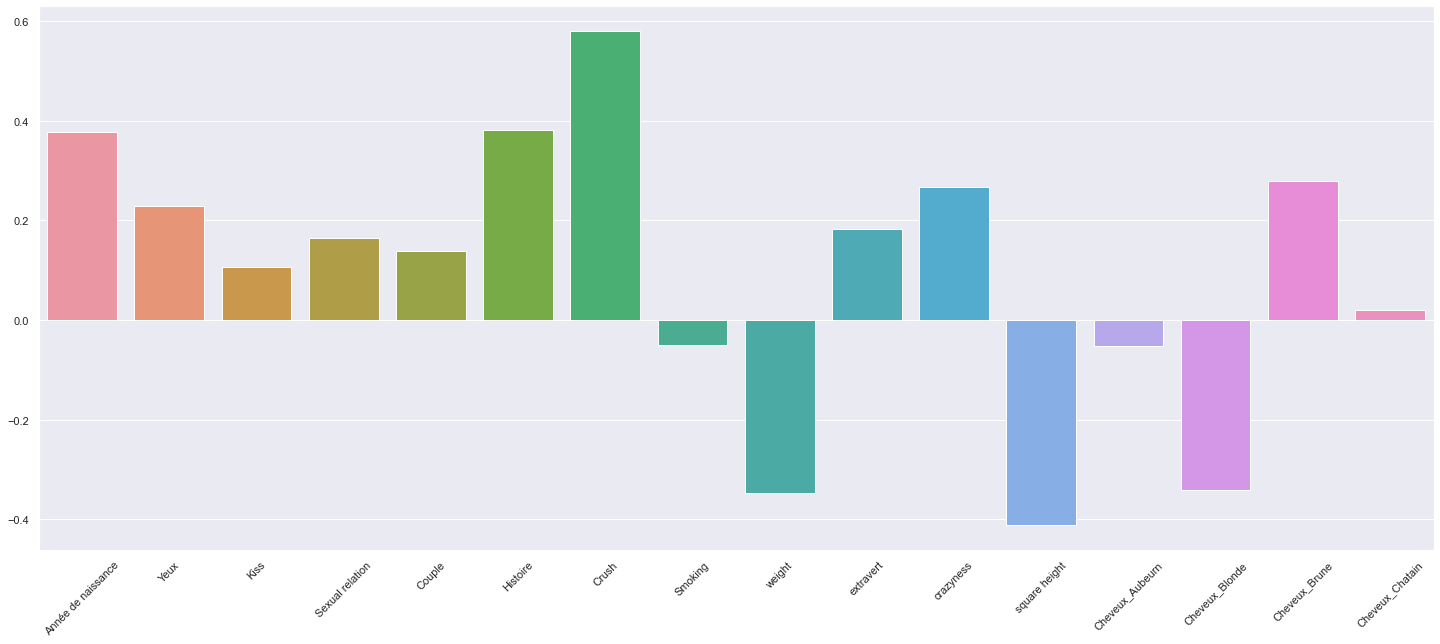

In [81]:
# Raph features dominance
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
sns.barplot(x=Xfeatures_raph, y=peoples_new_coefs[0])

<AxesSubplot:>

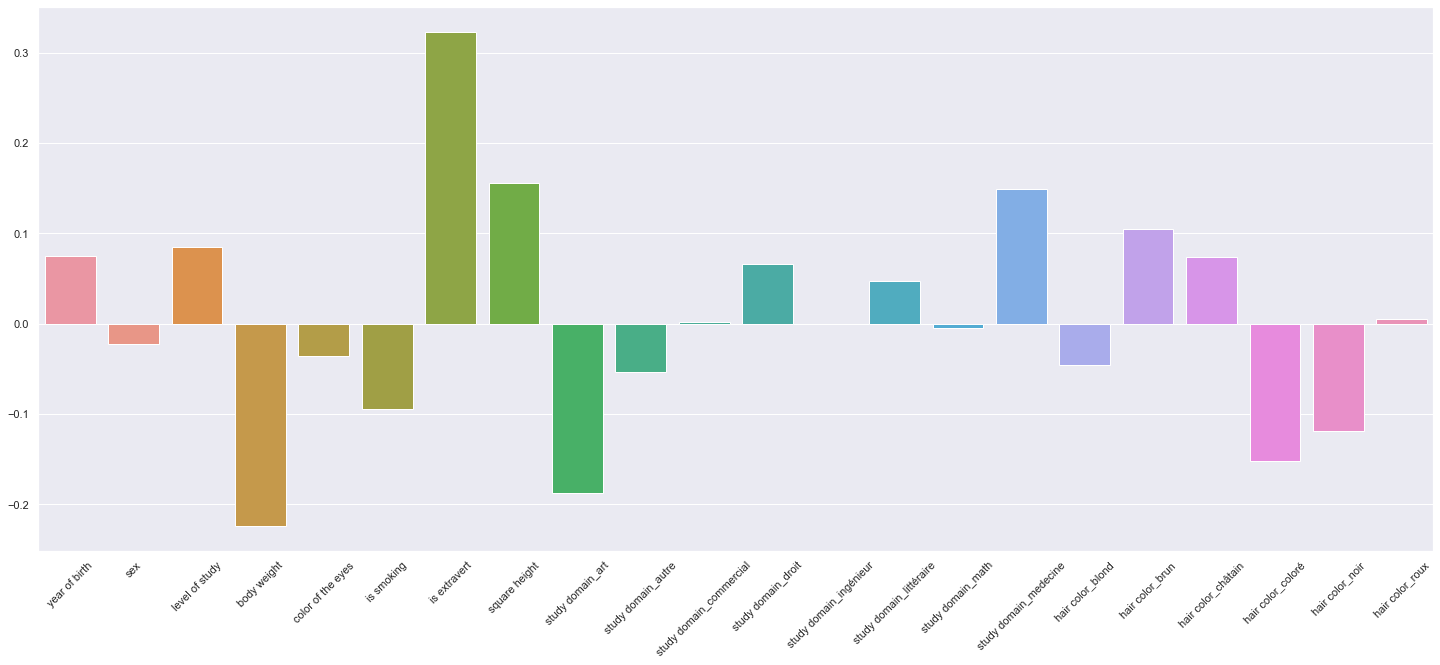

In [82]:
# Clothilde features dominance
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
sns.barplot(x=Xfeatures_clo, y=peoples_new_coefs[1])

<AxesSubplot:>

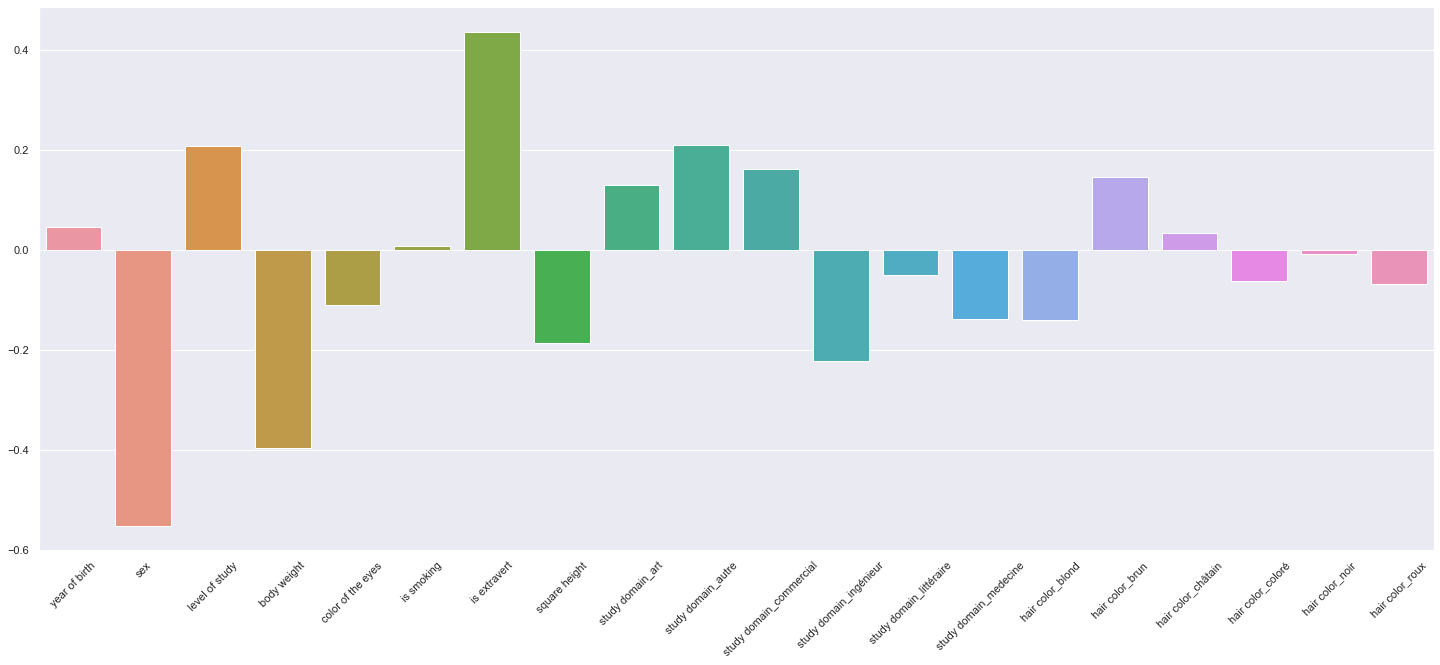

In [83]:
# Erwann features dominance
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
sns.barplot(x=Xfeatures_erwann, y=peoples_new_coefs[2])